In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

### 加载图片

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'D:/project/dataset/cat_and_dog/training_set', 
    target_size=(50, 50), 
    batch_size=32, 
    class_mode='binary')

test_set = train_datagen.flow_from_directory(
    'D:/project/dataset/cat_and_dog/test_set', 
    target_size=(50, 50), 
    batch_size=32, 
    class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### 建立cnn模型

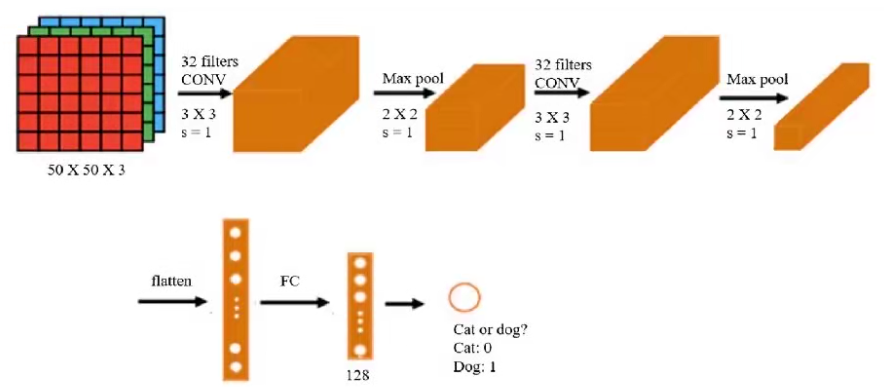

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
# 卷积层
model.add(Conv2D(32, (3,3), input_shape=(50,50,3), activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
# 卷积层
model.add(Conv2D(64, (3,3), activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
# 卷积层
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

## 配置模型

In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0

## 训练模型

In [5]:
%%time
history = model.fit_generator(training_set, epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
251/251 [==============================] - 18s 72ms/step - loss: 0.6853 - accuracy: 0.5484
Epoch 2/20
251/251 [==============================] - 18s 72ms/step - loss: 0.6750 - accuracy: 0.5811
Epoch 3/20
251/251 [==============================] - 18s 72ms/step - loss: 0.6430 - accuracy: 0.6232
Epoch 4/20
251/251 [==============================] - 18s 72ms/step - loss: 0.6120 - accuracy: 0.6623
Epoch 5/20
251/251 [==============================] - 18s 72ms/step - loss: 0.5670 - accuracy: 0.7036
Epoch 6/20
251/251 [==============================] - 18s 72ms/step - loss: 0.5127 - accuracy: 0.7448
Epoch 7/20
251/251 [==============================] - 18s 71ms/step - loss: 0.4750 - accuracy: 0.7704
Epoch 8/20
251/251 [==============================] - 18s 71ms/step - loss: 0.4446 - accuracy: 0.7899
Epoch 9/20
251/251 [==============================] - 18s 71ms/step - loss: 0.3876 - accuracy: 0.8229
Epoch 

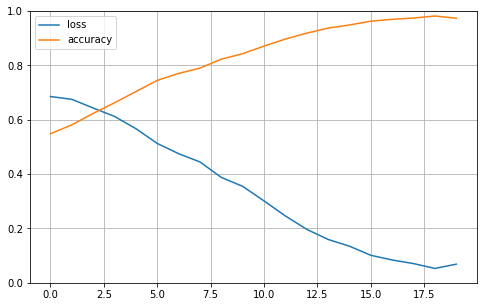

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [7]:
accuracy_train = model.evaluate_generator(training_set)
print(accuracy_train[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
0.9938788414001465


In [8]:
accuracy_test = model.evaluate_generator(test_set)
print(accuracy_test[1])

0.7834898829460144


## 用一张图片进行验证

In [9]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

pic_dog = 'D:/project/dataset/cat_and_dog/valid01.jpg'
pic_dog = load_img(pic_dog, target_size=(50,50))
pic_dog = img_to_array(pic_dog)
pic_dog = pic_dog / 255
pic_dog = pic_dog.reshape(1,50,50,3)
result = model.predict_classes(pic_dog)
print(result)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]]


In [11]:
pic_cat = 'D:/project/dataset/cat_and_dog/valid05.jpg'
pic_cat = load_img(pic_cat, target_size=(50,50))
pic_cat = img_to_array(pic_cat)
pic_cat = pic_cat / 255
pic_cat = pic_cat.reshape(1,50,50,3)
result2 = model.predict_classes(pic_cat)
print(result2)

[[0]]


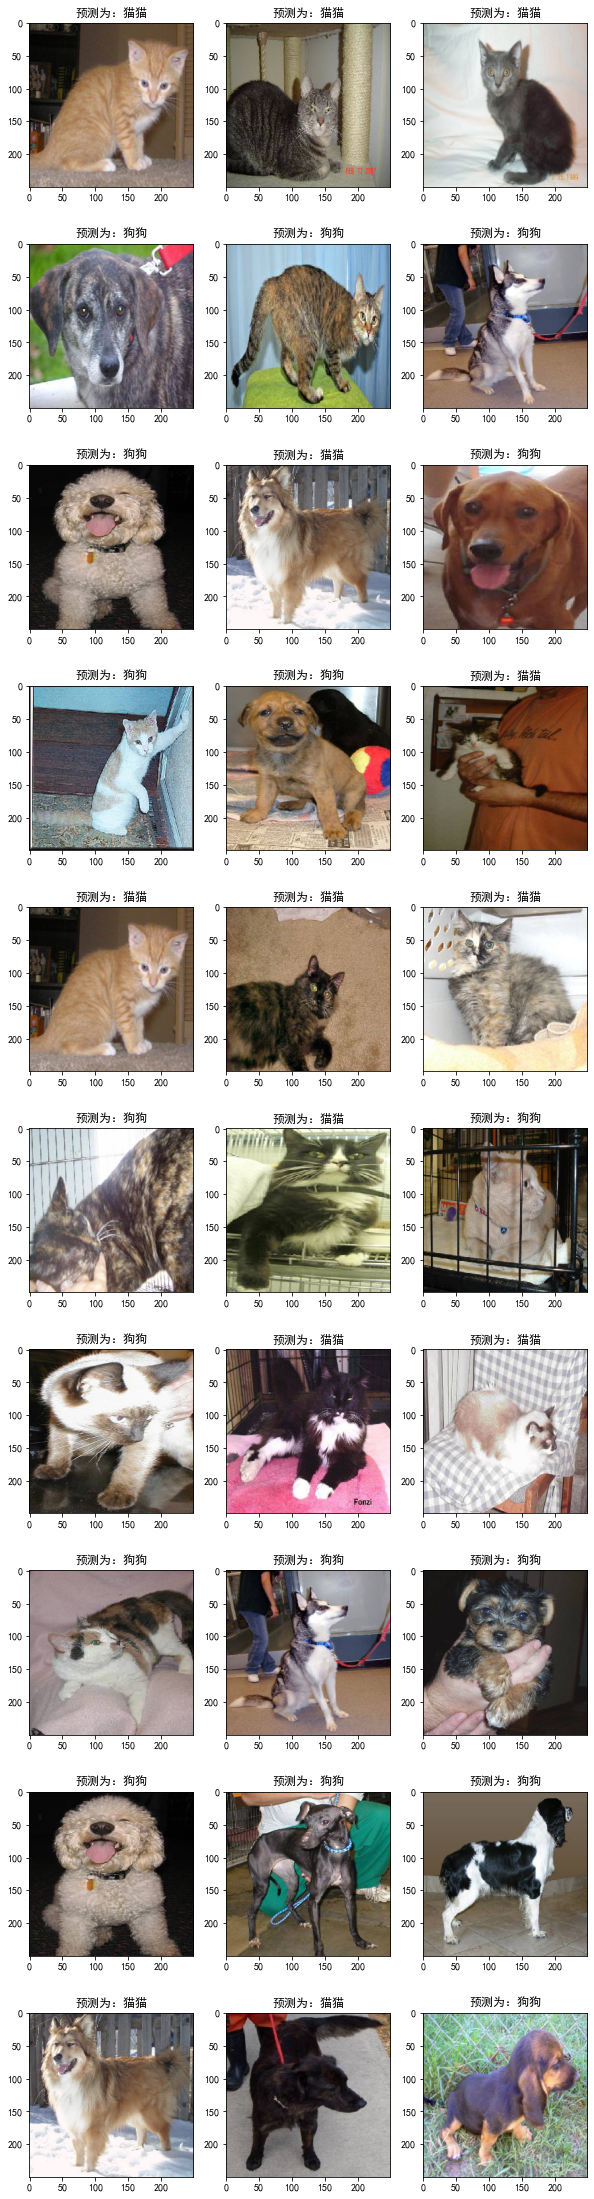

In [12]:
import matplotlib as mlp
font2 = {'family': 'SimHei',
         'weight': 'normal',
         'size': 20}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False

from matplotlib.image import imread
from tensorflow.keras.models import load_model

a = [i for i in range(1, 31)]
fig = plt.figure(figsize=(10, 40))

for i in a:
    img_name = 'D:/project/dataset/cat_and_dog/' + str(i) + '.jpg'
    img_ori = load_img(img_name, target_size=(50, 50))
    img = img_to_array(img_ori)
    img = img.astype('float32') / 255
    img = img.reshape(1, 50, 50, 3)
    result = model.predict_classes(img)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(10, 3, i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫猫')
    
plt.show()